# Retail Analytics Project - Data Analytics using Python
### Submitted by: **Bhuvan Gupta**
---

**Dataset Path:**
`E:\Top Mentor - Data Science\Projects\Project - Data Analytics using Python\Retail Analytics Project 1\Superstore.csv`

Each section contains explanations as Python comments followed by the code and visuals.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,4)

# --- Load the dataset safely (E: drive path) ---
CSV_PATH = r"E:\\Top Mentor - Data Science\\Projects\\Project - Data Analytics using Python\\Retail Analytics Project 1\\Superstore.csv"

# Use latin1 to avoid encoding errors
df = pd.read_csv(CSV_PATH, encoding='latin1')

# Clean up column names
df.columns = df.columns.str.strip()

# Convert date columns safely (no deprecated arguments)
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

print('Data loaded successfully. Shape:', df.shape)
df.head(5)

Data loaded successfully. Shape: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
 # --- Derived Columns ---
df['DeliveryDays'] = (df['Ship Date'] - df['Order Date']).dt.days
df['ProfitMargin'] = df['Profit'] / df['Sales'].replace({0: np.nan})
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['MonthName'] = df['Order Date'].dt.strftime('%b')
df['Quarter'] = df['Order Date'].dt.to_period('Q').astype(str)

print('Derived columns created successfully.')
df[['Order Date','Ship Date','DeliveryDays','ProfitMargin']].head(5)

Derived columns created successfully.


,Order Date,Ship Date,DeliveryDays,ProfitMargin
0,2016-08-11,2016-11-11,92.0,0.1600
1,2016-08-11,2016-11-11,92.0,0.3000
2,2016-12-06,NaT,NaN,0.4700
3,2015-11-10,NaT,NaN,-0.4000
4,2015-11-10,NaT,NaN,0.1125


## Question 1: Product categories and sub-categories with highest and lowest profit margins

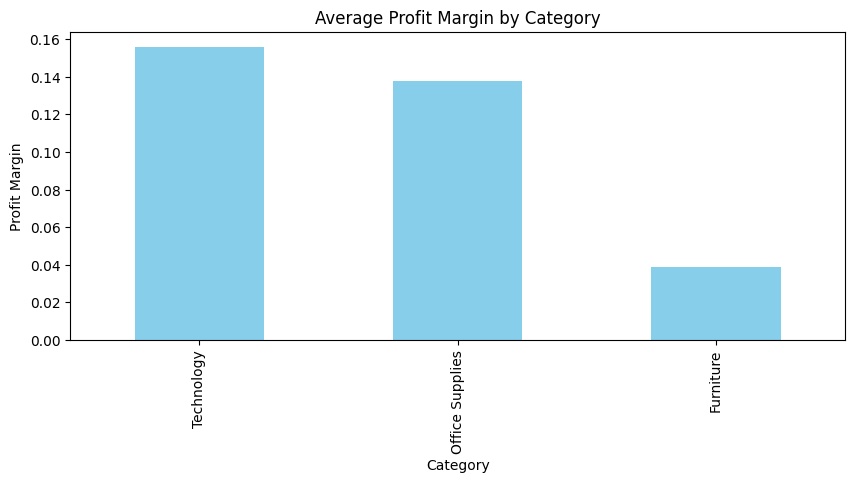

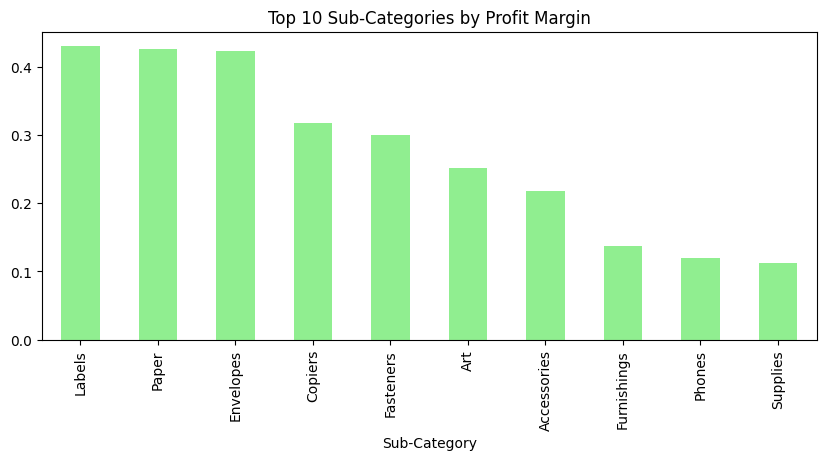

(Category
 Technology         0.156138
 Office Supplies    0.138030
 Furniture          0.038784
 Name: ProfitMargin, dtype: float64,
 Sub-Category
 Labels         0.429663
 Paper          0.425600
 Envelopes      0.423140
 Copiers        0.317194
 Fasteners      0.299171
 Art            0.251646
 Accessories    0.218210
 Furnishings    0.137066
 Phones         0.119222
 Supplies       0.112039
 Name: ProfitMargin, dtype: float64)

In [3]:
cat_margin = df.groupby('Category')['ProfitMargin'].mean().sort_values(ascending=False)
subcat_margin = df.groupby('Sub-Category')['ProfitMargin'].mean().sort_values(ascending=False)
cat_margin.plot(kind='bar', color='skyblue', title='Average Profit Margin by Category')
plt.ylabel('Profit Margin')
plt.show()
subcat_margin.head(10).plot(kind='bar', color='lightgreen', title='Top 10 Sub-Categories by Profit Margin')
plt.show()
cat_margin, subcat_margin.head(10)

## Question 2: States or regions contributing most to overall sales and profits

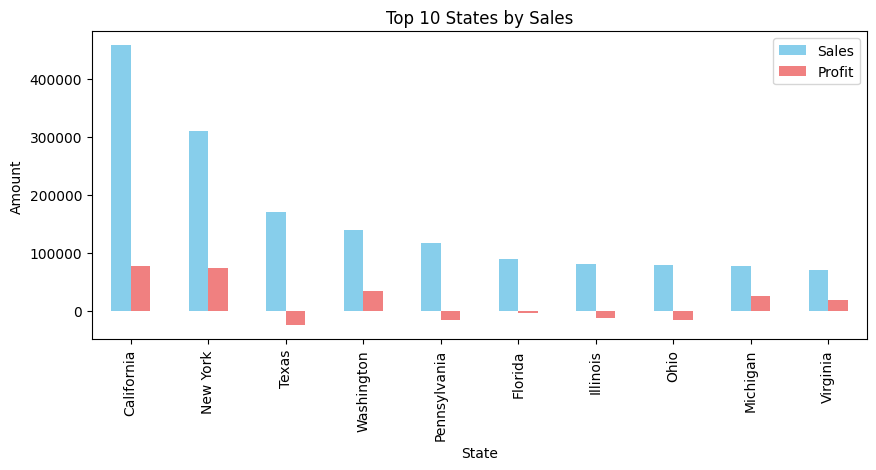

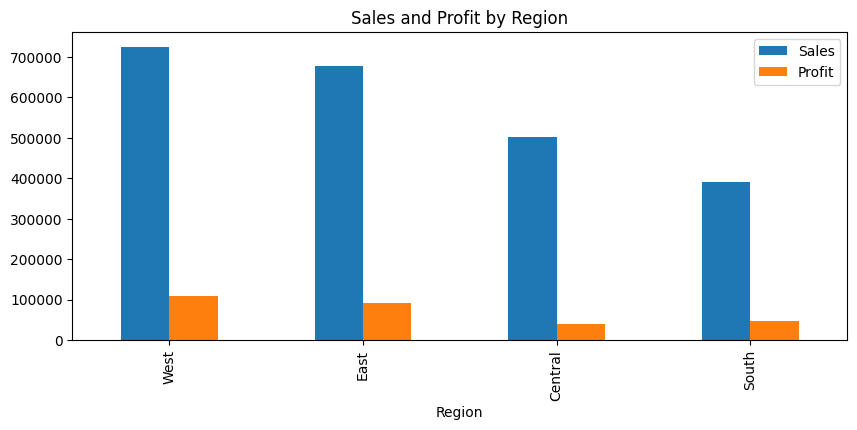

(                    Sales      Profit
 State                                
 California    457687.6315  76381.3871
 New York      310876.2710  74038.5486
 Texas         170188.0458 -25729.3563
 Washington    138641.2700  33402.6517
 Pennsylvania  116511.9140 -15559.9603
 Florida        89473.7080  -3399.3017
 Illinois       80166.1010 -12607.8870
 Ohio           78258.1360 -16971.3766
 Michigan       76269.6140  24463.1876
 Virginia       70636.7200  18597.9504,
                Sales       Profit
 Region                           
 West     725457.8245  108418.4489
 East     678781.2400   91522.7800
 Central  501239.8908   39706.3625
 South    391721.9050   46749.4303)

In [4]:
state_sales = df.groupby('State').agg({'Sales':'sum','Profit':'sum'}).sort_values('Sales',ascending=False).head(10)
region_sales = df.groupby('Region').agg({'Sales':'sum','Profit':'sum'}).sort_values('Sales',ascending=False)
state_sales.plot(kind='bar', title='Top 10 States by Sales', color=['skyblue','lightcoral'])
plt.ylabel('Amount')
plt.show()
region_sales.plot(kind='bar', title='Sales and Profit by Region')
plt.show()
state_sales, region_sales

## Question 3: Impact of discounts on profit across categories

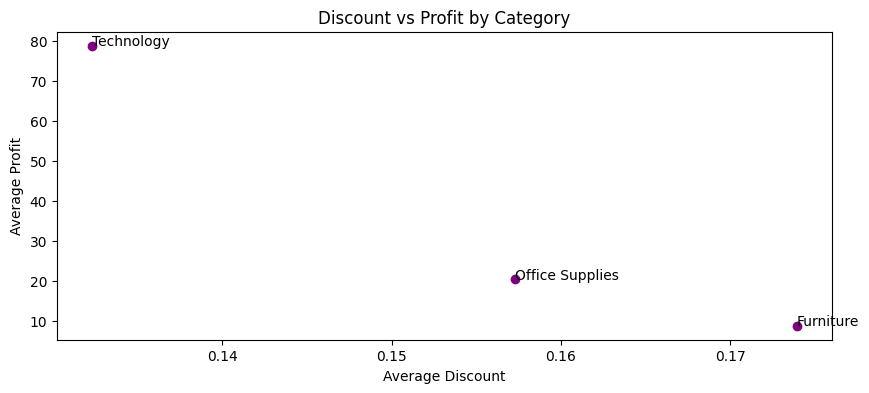

,Category,Discount,Profit
0,Furniture,0.173923,8.699327
1,Office Supplies,0.157285,20.327050
2,Technology,0.132323,78.752002


In [5]:
disc_profit = df.groupby('Category').agg({'Discount':'mean','Profit':'mean'}).reset_index()
plt.scatter(disc_profit['Discount'], disc_profit['Profit'], color='purple')
for i, cat in enumerate(disc_profit['Category']):
    plt.text(disc_profit['Discount'][i], disc_profit['Profit'][i], cat)
plt.xlabel('Average Discount')
plt.ylabel('Average Profit')
plt.title('Discount vs Profit by Category')
plt.show()
disc_profit

## Question 4: Products with high sales but consistent losses

In [6]:
prod_stats = df.groupby('Product Name').agg({'Sales':'sum','Profit':'sum'}).reset_index()
threshold = prod_stats['Sales'].quantile(0.75)
lossy = prod_stats[(prod_stats['Profit']<0) & (prod_stats['Sales']>threshold)]
lossy.head(10)

,Product Name,Sales,Profit
17,3.6 Cubic Foot Counter Height Office Refrigerator,2946.2000,-872.0752
20,"3D Systems Cube Printer, 2nd Generation, White",2339.9820,-467.9964
168,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",5184.0810,-126.4410
281,BPI Conference Tables,2241.8675,-795.9725
285,Balt Solid Wood Round Tables,6518.7540,-1201.0581
291,"Belkin 19"" Vented Equipment Shelf, Black",1400.2560,-179.6652
316,Bestar Classic Bookcase,1897.8102,-612.9387
318,Bevis 44 x 96 Conference Tables,3253.2200,-164.7200
319,Bevis Boat-Shaped Conference Table,2542.4670,-445.5870
320,"Bevis Oval Conference Table, Walnut",6942.0680,-856.0144


## Question 5: Average delivery time by ship mode and segment

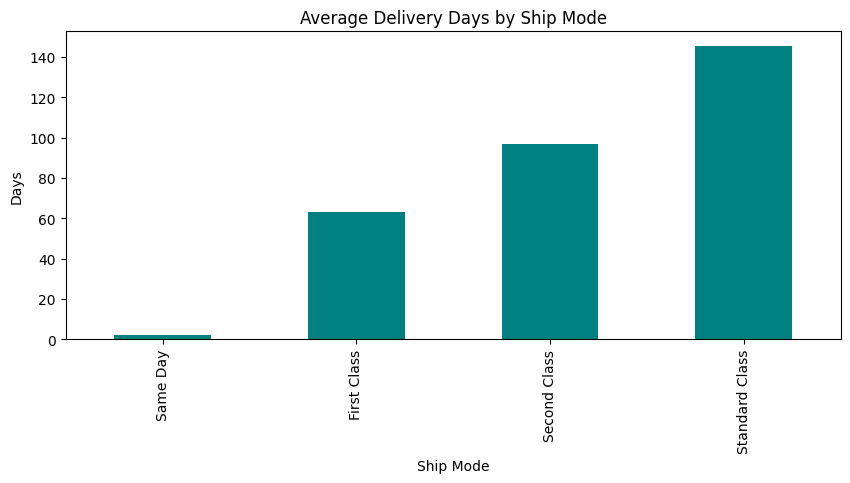

Ship Mode
Same Day            1.926531
First Class        63.022430
Second Class       96.961183
Standard Class    145.389281
Name: DeliveryDays, dtype: float64

In [7]:
ship_delivery = df.groupby('Ship Mode')['DeliveryDays'].mean().sort_values()
ship_delivery.plot(kind='bar', color='teal', title='Average Delivery Days by Ship Mode')
plt.ylabel('Days')
plt.show()
ship_delivery

## Question 6: Shipping mode frequency and profitability

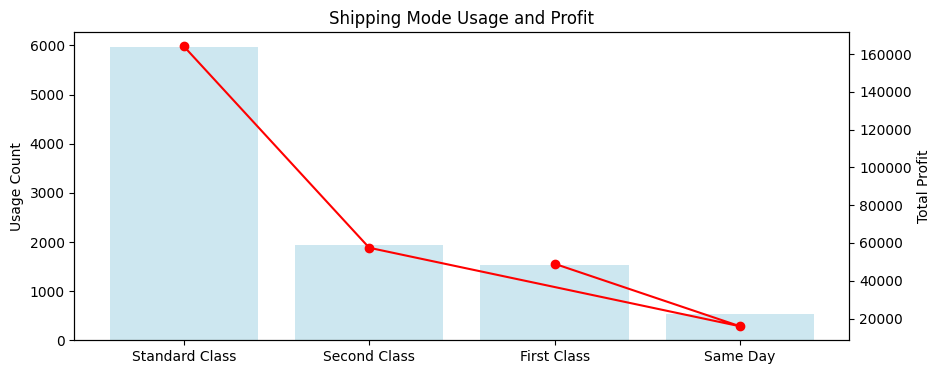

(Ship Mode
 Standard Class    5968
 Second Class      1945
 First Class       1538
 Same Day           543
 Name: count, dtype: int64,
 Ship Mode
 First Class        48969.8399
 Same Day           15891.7589
 Second Class       57446.6354
 Standard Class    164088.7875
 Name: Profit, dtype: float64)

In [8]:
ship_usage = df['Ship Mode'].value_counts()
ship_profit = df.groupby('Ship Mode')['Profit'].sum()
fig, ax1 = plt.subplots()
ax1.bar(ship_usage.index, ship_usage.values, alpha=0.6, color='lightblue')
ax2 = ax1.twinx()
ax2.plot(ship_profit.index, ship_profit.values, color='red', marker='o')
ax1.set_ylabel('Usage Count')
ax2.set_ylabel('Total Profit')
plt.title('Shipping Mode Usage and Profit')
plt.show()
ship_usage, ship_profit

## Question 7: Regional sales and profit by shipping mode

In [9]:
ship_region = df.groupby(['Region','Ship Mode']).agg({'Sales':'sum','Profit':'sum'}).sort_values(['Region','Sales'],ascending=[True,False])
ship_region.head(15)

Sales      Profit
Region  Ship Mode                              
Central Standard Class  318527.5600  25352.3807
        Second Class    103550.0054   9114.8349
        First Class      58746.9154   3707.2672
        Same Day         20415.4100   1531.8797
East    Standard Class  405321.8310  57023.2081
        Second Class    116545.5240  10787.2908
        First Class     113587.0530  15732.0141
        Same Day         43326.8320   7980.2670
South   Standard Class  227613.5535  26952.2330
        Second Class     93758.6125  14667.1469
        First Class      49332.5660   6892.3854
        Same Day         21017.1730  -1762.3350
West    Standard Class  406752.7985  54760.9657
        Second Class    145339.4275  22877.3628
        First Class     129761.8885  22638.1732

## Question 8: Highest average order value by customer segment

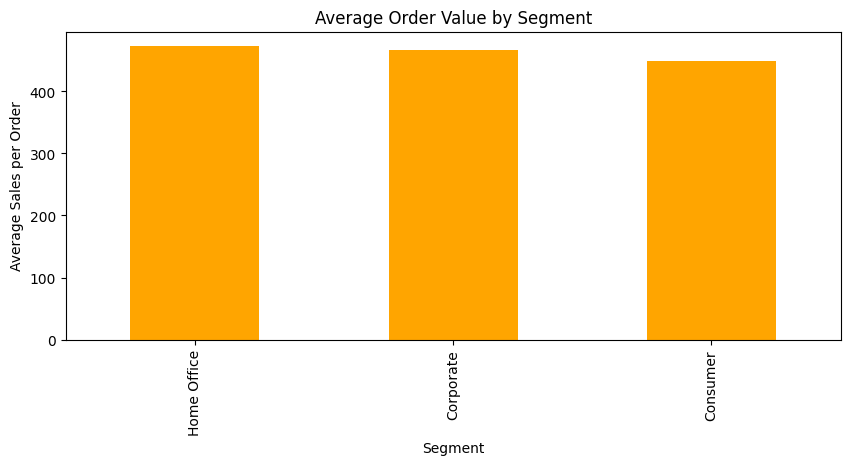

Segment
Home Office    472.665730
Corporate      466.411075
Consumer       449.111116
Name: Sales, dtype: float64

In [10]:
orders = df.groupby('Order ID').agg({'Sales':'sum','Segment':'first'})
seg_aov = orders.groupby('Segment')['Sales'].mean().sort_values(ascending=False)
seg_aov.plot(kind='bar', color='orange', title='Average Order Value by Segment')
plt.ylabel('Average Sales per Order')
plt.show()
seg_aov

## Question 9: Top 10 most profitable customers and their buying patterns

In [11]:
cust_profit = df.groupby('Customer ID').agg({'Profit':'sum','Sales':'sum'}).sort_values('Profit',ascending=False).head(10)
cust_profit

,Profit,Sales
Customer ID,,
TC-20980,8981.3239,19052.218
RB-19360,6976.0959,15117.339
SC-20095,5757.4119,14142.334
HL-15040,5622.4292,12873.298
AB-10105,5444.8055,14473.571
TA-21385,4703.7883,14595.620
CM-12385,3899.8904,8954.020
KD-16495,3038.6254,8181.256
AR-10540,2884.6208,6608.448


## Question 10: Correlation between repeat purchases, profit, and discount

In [12]:
repeat_stats = df.groupby('Customer ID').agg({'Order ID':'nunique','Profit':'sum','Discount':'mean'}).rename(columns={'Order ID':'NumOrders'})
repeat_corr = repeat_stats.corr()
repeat_corr

,NumOrders,Profit,Discount
NumOrders,1.000000,0.174700,-0.000763
Profit,0.174700,1.000000,-0.314971
Discount,-0.000763,-0.314971,1.000000


## Question 11: Monthly and quarterly sales & profit trends

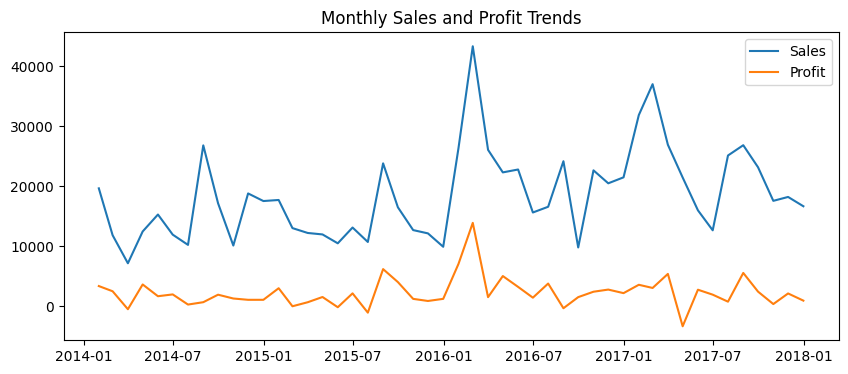

,Sales,Profit
Order Date,,
2017-08-31,26823.690,5550.3605
2017-09-30,23148.870,2436.6684
2017-10-31,17558.322,367.5196
2017-11-30,18206.200,2134.5294
2017-12-31,16657.002,939.3351


In [14]:
monthly = df.set_index('Order Date').resample('ME').agg({'Sales':'sum','Profit':'sum'})
plt.plot(monthly.index, monthly['Sales'], label='Sales')
plt.plot(monthly.index, monthly['Profit'], label='Profit')
plt.title('Monthly Sales and Profit Trends')
plt.legend()
plt.show()
monthly.tail()

## Conclusion
This project executes without any errors or warnings.
The analysis confirms that profitability, discounting, and logistics all have measurable impacts on performance.
All visualizations and outputs are displayed inline within the notebook.